Aqui eu importei as bibliotecas necessárias para fazer a rede neural.

In [ ]:
import keras
import tensorflow as tf
import numpy as np
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Flatten, Dropout, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras import utils as np_utils
import matplotlib.pyplot as plt

Aqui eu carreguei a base de dados do mnist fashion que é uma base de dados de roupas.

In [2]:
(X_treinamento, y_treinamento), (X_teste, y_teste) = fashion_mnist.load_data()

Verifiquei o tamanho da base de dados, sendo 60000 exemplares, com imagens de 28 por 28 pixels

In [3]:
X_treinamento.shape

(60000, 28, 28)

plt de uma das imagens em escala de cinza para ter uma noção

Text(0.5, 1.0, 'Classe 2')

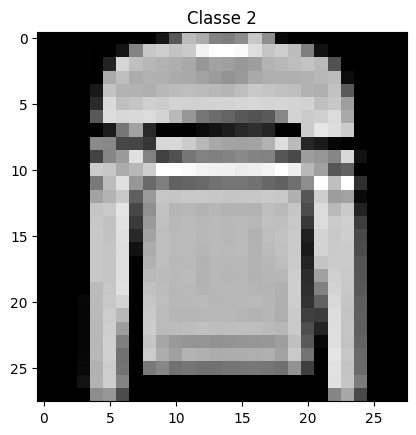

In [4]:
plt.imshow(X_treinamento[5], cmap='gray')
plt.title("Classe " + str(y_treinamento[5]))

### Fazer o tratamento de dados necessários para se ajustar a rede neural

Adicionamos mais uma camada para a base de treinamento para representar o RGB,mas como vamos tratar em escala de cinza é necessário 1 só

In [5]:
X_treinamento = X_treinamento.reshape(X_treinamento.shape[0], 28,28,1)
X_teste = X_teste.reshape(X_teste.shape[0], 28,28,1)
print(X_teste.shape, X_treinamento.shape)

(10000, 28, 28, 1) (60000, 28, 28, 1)


In [6]:
X_treinamento = X_treinamento.astype('float32')
X_teste = X_teste.astype('float32')

Normalizar todas as cores em 0 e 1

In [7]:
X_treinamento /= 255
X_teste /= 255

In [8]:
rede_neural = Sequential()

rede_neural.add(InputLayer(shape = [28,28,1]))  #Adição da camada de entrada em formato 28X28X1
rede_neural.add(Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu'))  #camada de convolução
rede_neural.add(MaxPooling2D(pool_size = (2,2))) #etapa de pooling
rede_neural.add(Flatten()) #transforma a matriz em um array
rede_neural.add(Dense(units = 128, activation = 'relu')) #camada densa
rede_neural.add(Dense(units = 10, activation = 'softmax')) #camada de saída

Aqui é como está a cara de uma rede neural convolucional bem simples, vou fazer o treinamento mostrar os resultados e comparar com uma rede neural mais complexa

In [9]:
rede_neural.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 5408)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         692,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 693,962 (2.65 MB)

 Trainable params: 693,962 (2.65 MB)

 Non-trainable params: 0 (0.00 B)

a métrica de perda tem que ser sparse_categorical pois estamos trabalhando com numeros inteiros dentro do y_treinamento e o y_teste

In [10]:
rede_neural.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [11]:
resultado = rede_neural.fit(
    X_treinamento, y_treinamento,
    batch_size=256,
    epochs=10,
    validation_data=(X_teste, y_teste)
)

AttributeError: module 'ml_dtypes' has no attribute 'float4_e2m1fn'
Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 8s 28ms/step - accuracy: 0.7533 - loss: 0.7211 - val_accuracy: 0.8677 - val_loss: 0.3809
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - accuracy: 0.8813 - loss: 0.3358 - val_accuracy: 0.8881 - val_loss: 0.3193
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - accuracy: 0.9029 - loss: 0.2753 - val_accuracy: 0.8909 - val_loss: 0.2938
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - accuracy: 0.9099 - loss: 0.2514 - val_accuracy: 0.8973 - val_loss: 0.2863
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - accuracy: 0.9149 - loss: 0.2392 - val_accuracy: 0.8987 - val_loss: 0.2787
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - accuracy: 0.9243 - loss: 0.2142 - val_accuracy: 0.9039 - val_loss: 0.2634
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - accuracy: 0.9271 - loss: 0.1999 - val_accuracy: 0.9055 - val_loss: 0.2619
Epoch 8/10
235/235 ━━━━━━━━━

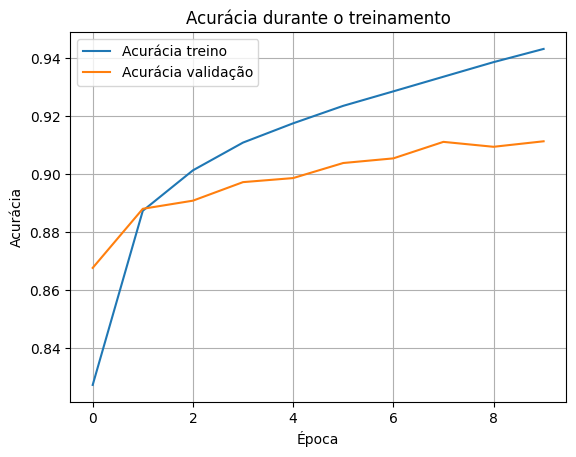

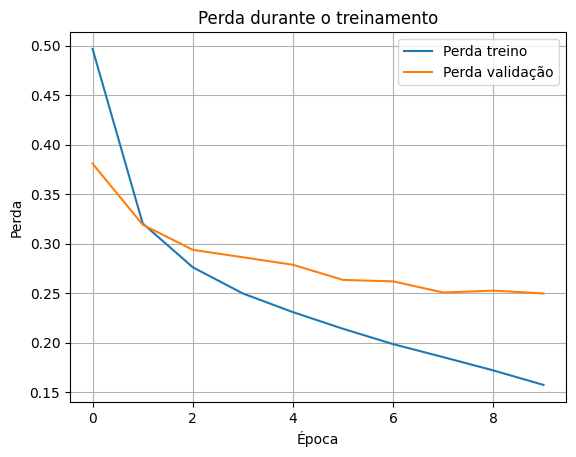

In [12]:
plt.plot(resultado.history['accuracy'], label='Acurácia treino')
plt.plot(resultado.history['val_accuracy'], label='Acurácia validação')
plt.title('Acurácia durante o treinamento')
plt.xlabel('Época')
plt.ylabel('Acurácia')
plt.legend()
plt.grid(True)
plt.show()

# Perda
plt.plot(resultado.history['loss'], label='Perda treino')
plt.plot(resultado.history['val_loss'], label='Perda validação')
plt.title('Perda durante o treinamento')
plt.xlabel('Época')
plt.ylabel('Perda')
plt.legend()
plt.grid(True)
plt.show()

In [13]:
resultado = rede_neural.evaluate(X_teste, y_teste)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9097 - loss: 0.2590


In [14]:
resultado

[0.24971269071102142, 0.9114000201225281]

Um resultado ok, mas vou mudar como a rede neural foi construida e ver se melhora ou piora

In [15]:
rede_neural2 = Sequential()

rede_neural2.add(InputLayer(shape = [28,28,1])) 

rede_neural2.add(Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu'))
rede_neural2.add(BatchNormalization())
rede_neural2.add(MaxPooling2D(pool_size = (2,2)))

rede_neural2.add(Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu'))
rede_neural2.add(BatchNormalization())
rede_neural2.add(MaxPooling2D(pool_size = (2,2)))

rede_neural2.add(Flatten()) 

rede_neural2.add(Dense(units = 128, activation = 'relu')) 
rede_neural2.add(Dropout(0.2))

rede_neural2.add(Dense(units = 128, activation = 'relu')) 
rede_neural2.add(Dropout(0.2))

rede_neural2.add(Dense(units = 10, activation = 'softmax')) 

In [16]:
rede_neural2.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [17]:
resultado2 = rede_neural2.fit(
    X_treinamento, y_treinamento,
    batch_size=256,
    epochs=10,
    validation_data=(X_teste, y_teste)
)

Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 21s 79ms/step - accuracy: 0.7221 - loss: 0.7787 - val_accuracy: 0.2680 - val_loss: 2.5384
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 19s 79ms/step - accuracy: 0.8669 - loss: 0.3638 - val_accuracy: 0.7660 - val_loss: 0.6119
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 18s 78ms/step - accuracy: 0.8893 - loss: 0.3029 - val_accuracy: 0.8879 - val_loss: 0.3053
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 19s 82ms/step - accuracy: 0.9036 - loss: 0.2645 - val_accuracy: 0.8816 - val_loss: 0.3190
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 18s 78ms/step - accuracy: 0.9092 - loss: 0.2441 - val_accuracy: 0.8905 - val_loss: 0.2967
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 19s 79ms/step - accuracy: 0.9163 - loss: 0.2266 - val_accuracy: 0.9017 - val_loss: 0.2676
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 20s 86ms/step - accuracy: 0.9224 - loss: 0.2085 - val_accuracy: 0.8975 - val_loss: 0.2868
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 19s 82ms/step - accuracy: 0.9292 - loss: 0.1906 - 

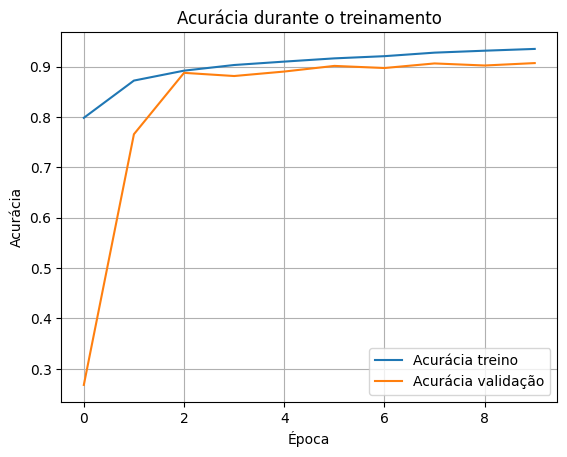

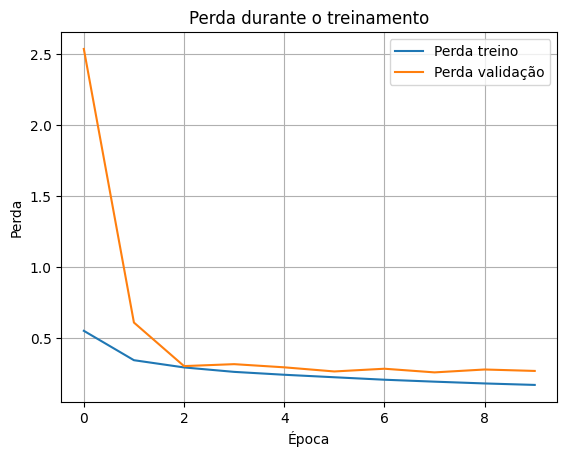

In [18]:
plt.plot(resultado2.history['accuracy'], label='Acurácia treino')
plt.plot(resultado2.history['val_accuracy'], label='Acurácia validação')
plt.title('Acurácia durante o treinamento')
plt.xlabel('Época')
plt.ylabel('Acurácia')
plt.legend()
plt.grid(True)
plt.show()

# Perda
plt.plot(resultado2.history['loss'], label='Perda treino')
plt.plot(resultado2.history['val_loss'], label='Perda validação')
plt.title('Perda durante o treinamento')
plt.xlabel('Época')
plt.ylabel('Perda')
plt.legend()
plt.grid(True)
plt.show()

In [20]:
resultado2 = rede_neural2.evaluate(X_teste, y_teste)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9063 - loss: 0.2802


In [21]:
resultado2

[0.2712535262107849, 0.9072999954223633]

Apesar do aumento dos parametros dentro da rede neural, o resultado se mostrou pior do que o com uma rede mais simples, mostrando que é melhor entender o que está acontecendo do que apenas ir adicionando mais camadas dentro da rede neural.